# EDA: Forest Cover Type Prediction

### Data Description

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

### Data Fields
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries
import time
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data into dataframe for exploration.

In [2]:
data = pd.read_csv(r"data\covtype.csv")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 <a list of 55 Text xticklabel objects>)

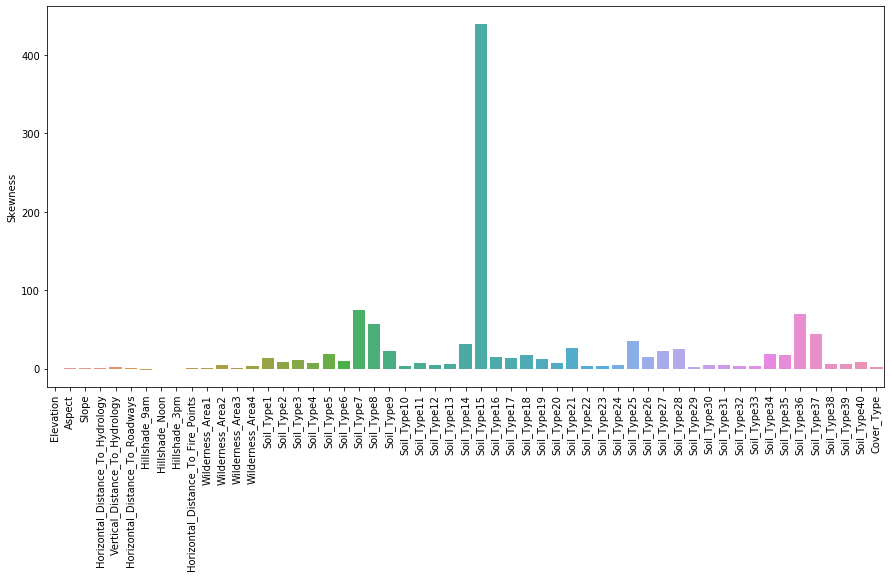

In [3]:
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

#### Some of the Variables are heavily skewed hence need to be corrected or transformed on a later stage.


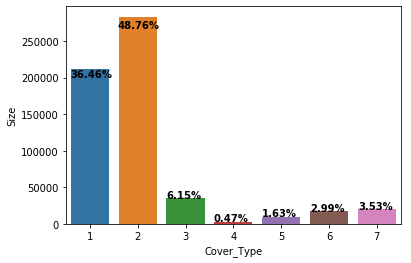

In [4]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
fig, ax = plt.subplots()
#plt.figure(figsize=(8,6))
width = 0.35  # the width of the bars
sns.barplot(x=class_label.index,y='Size',data=class_label)

for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    label = str(round(percent,2)) + '%'
    plt.annotate(label, xy=(i*48+70,percent*4+40), xycoords='figure points', horizontalalignment='left',weight='bold');  

Well over 70% of the data is types 1 and 2.  We should be aware of this as we try to fit our data, making sure we do not overfit because of this skewness.

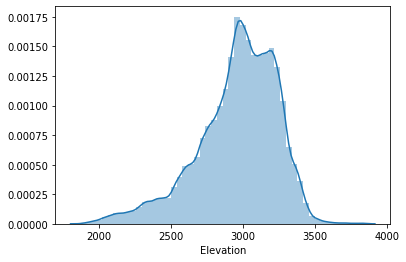

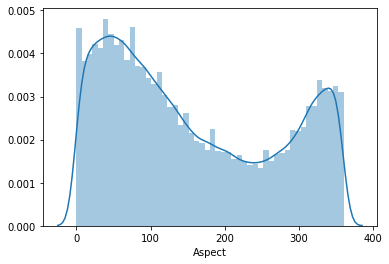

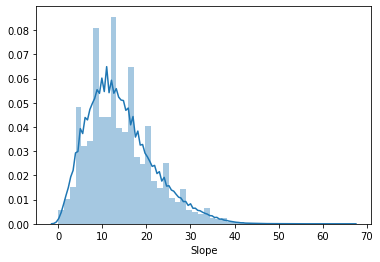

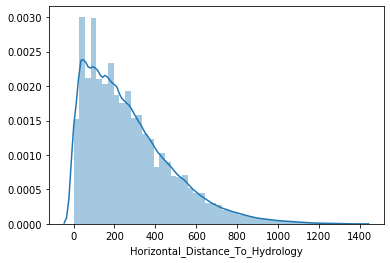

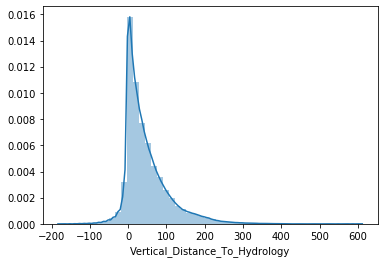

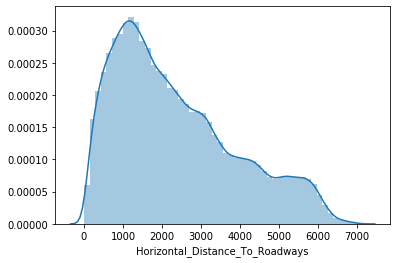

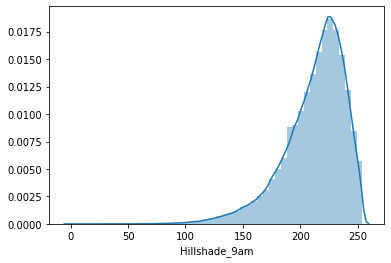

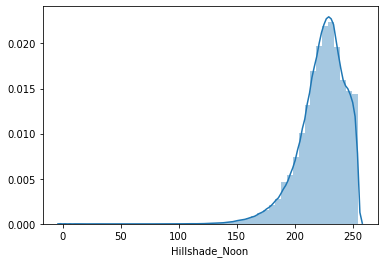

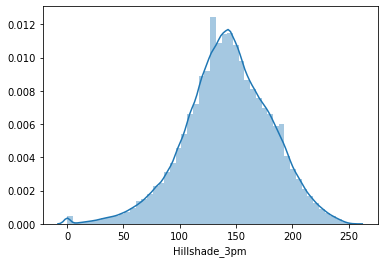

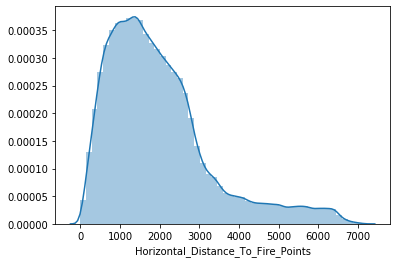

In [5]:
#get same plots as shown in Kraggle for EDA
continous_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
for i, col in enumerate(continous_data.columns):
    plt.figure(i)
    sns.distplot(continous_data[col])

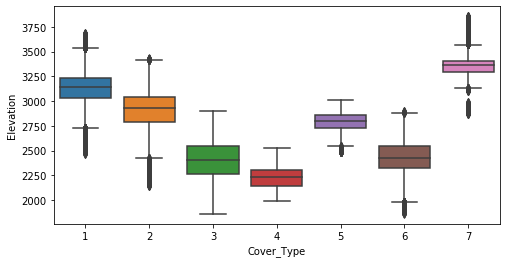

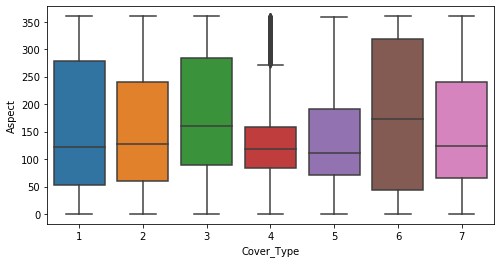

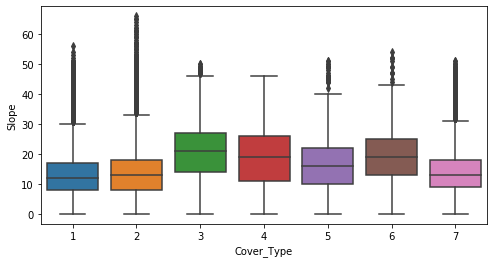

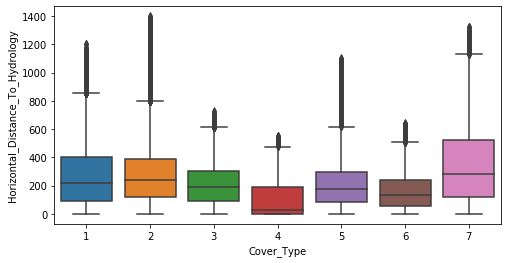

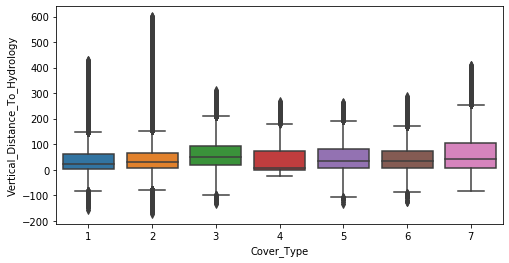

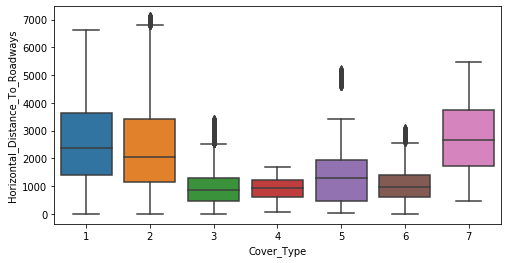

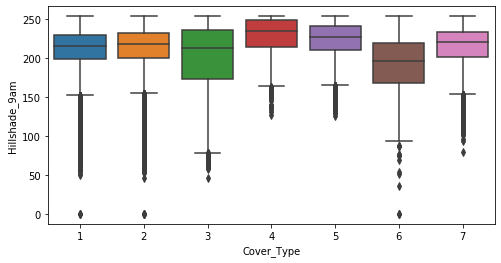

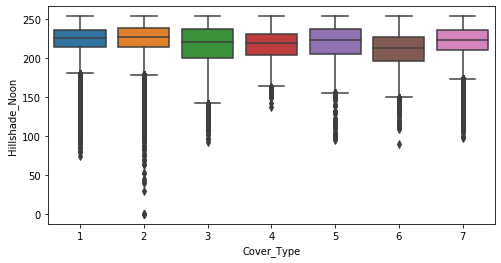

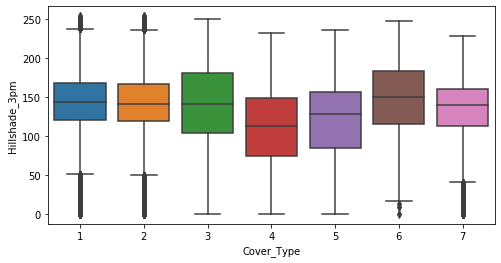

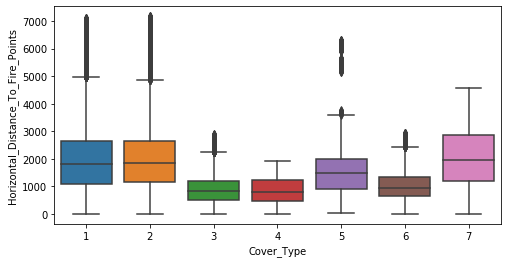

In [6]:
data['Cover_Type']=data['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(continous_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Cover_Type'], y=col, data=data)

For all of this continous data - the most telling in the EDA is the elevation.

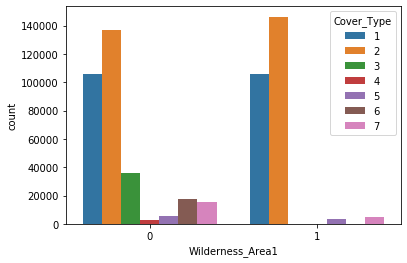

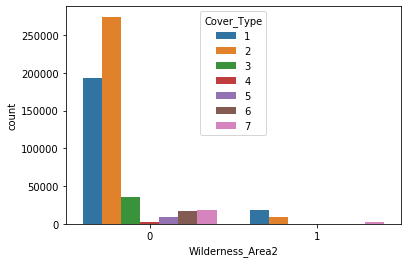

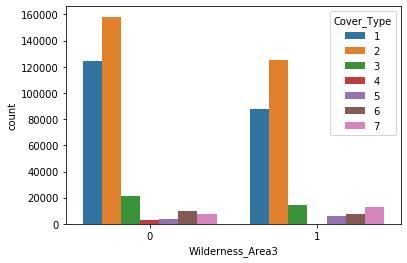

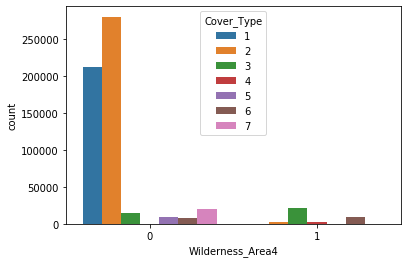

In [7]:
Wilderness_data=data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

for i, col in enumerate(Wilderness_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=data['Cover_Type'], data=data)

  Interesting to note how cover type can very dependant on Wilderness Areas. Areas 2 and 4 have little of cover types 1 and 2, the most common of cover types.

# Decision Tree

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

train_df = pd.read_csv(r"data\train.csv")
test_df = pd.read_csv(r"data\test.csv")

# Build the np arrays
train_data = train_df.to_numpy()
test_data = test_df.to_numpy()

# Get last column for train labels
train_labels = train_data[ :,55]

#Remove last column from train_data because that is the labels
train_data = np.delete(train_data, 55, axis=1)

# Shuffle the input
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
train_data, train_labels = train_data[shuffle], train_labels[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = train_data[0:2000,:], train_labels[0:2000]
dev_data, dev_labels = train_data[2000:14000,:], train_labels[2000:14000]
mini_train_data, mini_train_labels = train_data[14000:15000,:], train_labels[14000:15000]

In [9]:
def print_importances(clf):
    importances = np.round(clf.feature_importances_,4)
    features = train_df.columns[0:55].to_numpy()
    importances_df = pd.DataFrame({'feature':features,'importance':importances})
    importances_df = importances_df.sort_values('importance',ascending=False)
    importances_df = importances_df[(importances_df.sum(axis=1) != 0)]  
    print(importances_df)

In [10]:
def print_structure(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has {n} nodes and has the following tree structure:\n".format(n=n_nodes))
    for i in range(n_nodes):
        if is_leaves[i]:
            values = clf.tree_.value[i]
            max_value = values.max()
            cover_type = np.argmax(values)
            print("{space}node={node} is a leaf node with max value of {value} and cover type of {ctype}"
                  .format(space=node_depth[i] * "\t", node=i, value=max_value, ctype=cover_type))
        else:
            print("{space}node={node} is a split node: go to node {left} if {feature} <= {threshold} else to node {right}.".format(
                      space=node_depth[i] * "\t",
                      node=i,
                      left=children_left[i],
                      feature=train_df.columns[feature[i]],
                      threshold=threshold[i],
                      right=children_right[i]))

Desicion Tree Score: 64.74%
Decision Tree Depth is 4 and has 16 leaves


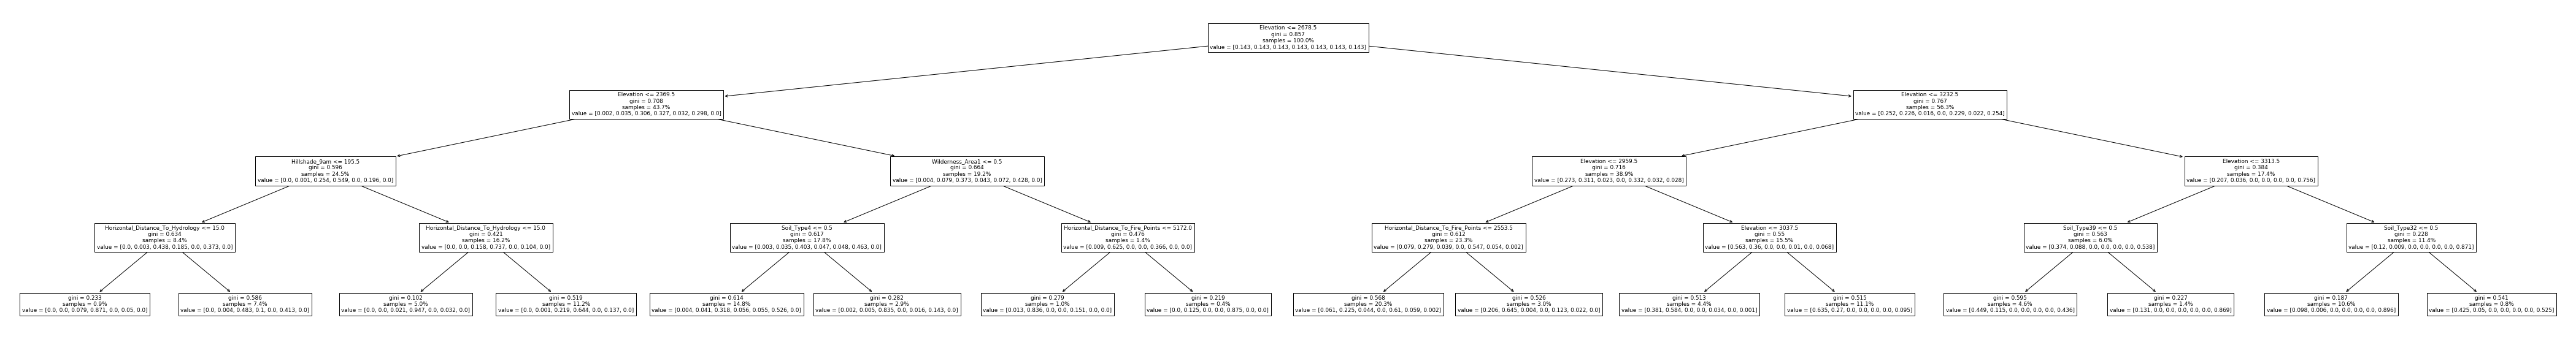

Confusion Matrix:

[[1068  286    0    0  148    6  187]
 [ 420  641    4    1  569   73   13]
 [   0    1  717  326  112  565    0]
 [   0    0   92 1529    0  103    0]
 [   0   81    7    0 1530   94    0]
 [   0    8  407  206  144  933    0]
 [ 371    1    0    0    6    0 1351]]


In [11]:
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf = clf.fit(train_data, train_labels)
predicted_labels = clf.predict(dev_data)
tree_model_score = clf.score(dev_data, dev_labels)
depth = clf.get_depth()
num_leaves = clf.get_n_leaves()

print('Desicion Tree Score: %.2f%%' % (tree_model_score*100))   
print('Decision Tree Depth is %d and has %d leaves' % (depth, num_leaves))

plt.figure(figsize=(75,10))
tree.plot_tree(clf, feature_names=train_df.columns, proportion=True)
plt.show()
#print_importances(clf)
#print_structure(clf)
print("Confusion Matrix:\n")
print(confusion_matrix(dev_labels, predicted_labels))

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

depths = {"max_depth": [3, 4, 5, 10, 20, 25]}

grid_search_decision_tree = GridSearchCV(tree.DecisionTreeClassifier(), depths, scoring='accuracy')
grid_search_decision_tree.fit(train_data, train_labels)
predicted = grid_search_decision_tree.predict(dev_data)
optimal_depth = grid_search_decision_tree.best_params_['max_depth']
print("The optimal value for depth using GridSearchCV method is {depth} with accuracy of {accuracy}"
      .format(depth=optimal_depth, accuracy=metrics.accuracy_score(dev_labels, predicted)))



The optimal value for depth using GridSearchCV method is 20 with accuracy of 0.9913333333333333


In [14]:
clf_final = tree.DecisionTreeClassifier(max_depth=25, random_state=0)
clf_final = clf_final.fit(train_data, train_labels)
test_predictions = clf_final.predict(test_df)

predictions_dt = pd.DataFrame(data = test_predictions, index = test_df.loc[:, "Id"], columns = ["Cover_Type"])
predictions_dt.to_csv("dt_predictions.csv")  #Kaggle Score of 0.59266
predictions_dt

,Cover_Type
Id,
15121,5
15122,5
15123,5
15124,5
15125,5
...,...
581008,3
581009,3
581010,3
